In this project, I will conduct an A/B test to compare the performance of two advertising campaigns - the control campaign and the test campaign. Our goal is to determine which campaign resulted in higher reach and website clicks. To do this, we collected data on the amount spent, number of impressions, reach, website clicks, searches received, content viewed, items added to cart, and purchases for each campaign. We will then perform statistical analysis to compare the results of the two campaigns and draw conclusions about their relative effectiveness. By the end of the project, we should able to provide valuable insights to our client on which campaign to continue investing in for their advertising efforts.

In [54]:
#importing necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#importing our data:
control = pd.read_csv('control_group.csv', sep =';')
test = pd.read_csv('test_group.csv', sep= ';')

print(control.head())
print(test.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

Preparing data: fixing errors in column names, replacing NaN values with means.

In [10]:
control.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]
test.columns= ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]


print(control.isna().sum())
print(test.isna().sum())



Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64
Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


In [13]:
def fill_missing_values(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            continue  
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col].fillna(value=data[col].mean(), inplace=True)
    return data
fill_missing_values(control)
print(control.isna().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


In [15]:
concat_data = pd.concat([control, test]) 
concat_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103


In [17]:
print(concat_data["Campaign Name"].value_counts())
#confirmed that each sample is the same size

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64


Scatter plot (number of impressions)
Pie chart for total clicks, pie chart for searches, content viewed, added to cart, amount spent, purchases


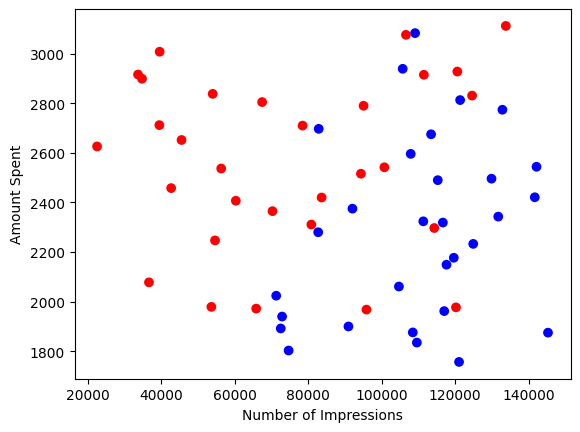

In [31]:
colors = ['blue' if x == 'Control Campaign' else 'red' for x in concat_data['Campaign Name']]
plt.xlabel('Number of Impressions')
plt.ylabel('Amount Spent')
plt.scatter(x=concat_data['Number of Impressions'], y=concat_data['Amount Spent'], c= colors)
plt.show()


In [22]:
grouped_table = concat_data.groupby('Campaign Name').sum(numeric_only = True)
grouped_table

,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
Campaign Name,,,,,,,,
Control Campaign,68653,3.286793e+06,2.665348e+06,159623.793103,66639.310345,58313.793103,39000.0,15683.793103
Test Campaign,76892,2.237544e+06,1.604747e+06,180970.000000,72569.000000,55740.000000,26446.0,15637.000000


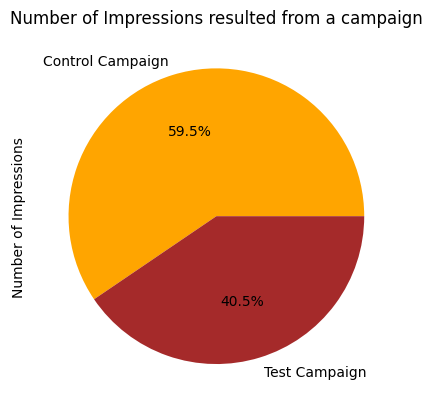

The difference between Test Group and Control Group was  -1049249
The % difference between Test Group and Control Group was  -19 %


In [52]:
grouped_table['Number of Impressions'].plot.pie(autopct='%1.1f%%', colors=['orange', 'brown'])
plt.title('Number of Impressions resulted from a campaign')
plt.show()

def difference_calc(column):
    control_amount = grouped_table.loc['Control Campaign', column]
    test_amount = grouped_table.loc['Test Campaign', column]
    difference = round(test_amount - control_amount)
    perc_diff= round(difference/(test_amount + control_amount)*100)
    print("The difference between Test Group and Control Group was " , difference )
    print("The % difference between Test Group and Control Group was " , perc_diff, "%" )

difference_calc('Number of Impressions')

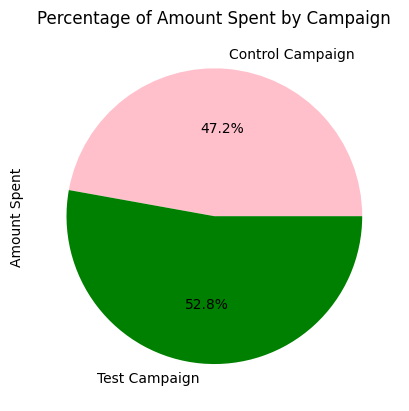

The difference between Test Group and Control Group was  8239
The % difference between Test Group and Control Group was  6 %


In [53]:
grouped_table['Amount Spent'].plot.pie(autopct='%1.1f%%', colors=['pink', 'green'])
plt.title('Percentage of Amount Spent by Campaign')
plt.show()

difference_calc('Amount Spent')

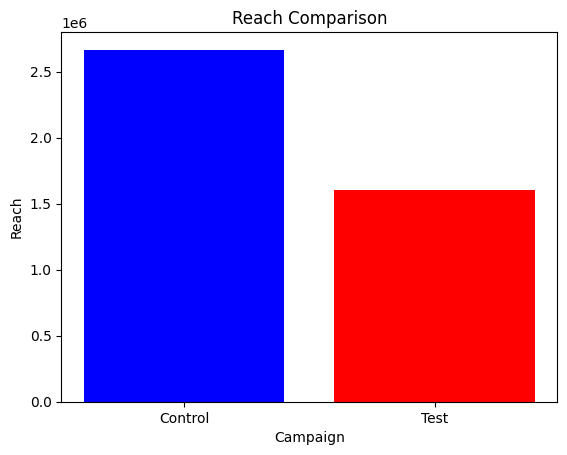

The difference between Test Group and Control Group was  -1060601
The % difference between Test Group and Control Group was  -25 %


In [60]:
reach_control = grouped_table.loc['Control Campaign', 'Reach']
reach_test = grouped_table.loc['Test Campaign', 'Reach']

plt.bar(['Control', 'Test'], [reach_control, reach_test], color=['blue', 'red'])
plt.xlabel('Campaign')
plt.ylabel('Reach')
plt.title('Reach Comparison')
plt.show()

difference_calc('Reach')

In [69]:
grouped_table.loc["Comparison"] = grouped_table.iloc[0] > grouped_table.iloc[1]
grouped_table

,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
Campaign Name,,,,,,,,
Control Campaign,68653,3286792.758621,2665347.931034,159623.793103,66639.310345,58313.793103,39000.0,15683.793103
Test Campaign,76892,2237544.0,1604747.0,180970.0,72569.0,55740.0,26446.0,15637.0
Comparison,False,True,True,False,False,True,True,True


In [72]:
len(grouped_table.columns)
comparison_row = grouped_table.iloc[-1]
counts = comparison_row.value_counts()
counts

True     5
False    3
Name: Comparison, dtype: int64

Based on the results of our A/B test, the Control Campaign outperformed the Test Campaign in terms of number of impressions, reach, content views, cart adds and purchases. Despite the Test Campaign having a higher amount spent, it did not generate as much traction as the Control Campaign. Out of the 8 characteristics tracked, the Control Campaign was superior to the Test Campaign 5 out of 8 times, indicating a 63% success rate. Therefore, the Control Campaign is recommended for increasing overall brand awareness and marketing efforts. However, the Test Campaign could be useful for targeting specific audiences or promoting specific products.
Additionally, the results of this A/B test indicate that the amount spent on a campaign may not necessarily directly correlate with its success. Therefore, it is important to carefully evaluate and track various metrics to determine the most effective marketing strategies for a particular product or target audience. As with any A/B test, it is recommended to continue testing and experimenting with different approaches in order to optimize marketing efforts and maximize ROI.